# Ejercicio de clasificación utilizando machine learning

En el siguiente ejercicio, se realiza la tarea de clasificación utilizando los siguientes algoritmos:
* LogisticRegression() = Regresión logistica
* DecisionTreeClassifier() = Arboles de decisión (*Decision Trees and Random Forests*)
* SVC() = Máquinas de vectores de soporte (*Support Vector Machines o SVM*)

La base de datos de ha obtenido de: https://www.kaggle.com/code/sandeshpatkar/auto-insurance-fraud/

In [1]:
import numpy as np
import pandas as pd
np.random.seed(123)

In [2]:
df = pd.read_csv('insurance_claims.csv')
df.tail(3)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
997,130,34,918516,2003-02-17,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,2011-11-18,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN
999,456,60,556080,1996-11-11,OH,250/500,1000,766.19,0,612260,...,?,5060,460,920,3680,Mercedes,E400,2007,N,NaN


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
months_as_customer,1000.0,2.039540e+02,1.151132e+02,0.00,115.7500,199.5,276.250,479.00
age,1000.0,3.894800e+01,9.140287e+00,19.00,32.0000,38.0,44.000,64.00
policy_number,1000.0,5.462386e+05,2.570630e+05,100804.00,335980.2500,533135.0,759099.750,999435.00
policy_deductable,1000.0,1.136000e+03,6.118647e+02,500.00,500.0000,1000.0,2000.000,2000.00
policy_annual_premium,1000.0,1.256406e+03,2.441674e+02,433.33,1089.6075,1257.2,1415.695,2047.59
umbrella_limit,1000.0,1.101000e+06,2.297407e+06,-1000000.00,0.0000,0.0,0.000,10000000.00
insured_zip,1000.0,5.012145e+05,7.170161e+04,430104.00,448404.5000,466445.5,603251.000,620962.00
capital-gains,1000.0,2.512610e+04,2.787219e+04,0.00,0.0000,0.0,51025.000,100500.00
capital-loss,1000.0,-2.679370e+04,2.810410e+04,-111100.00,-51500.0000,-23250.0,0.000,0.00
incident_hour_of_the_day,1000.0,1.164400e+01,6.951373e+00,0.00,6.0000,12.0,17.000,23.00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [5]:
for i in df.columns:
    if df[i].dtype == 'object':
        print(i, ":", df[i].nunique())

policy_bind_date : 951
policy_state : 3
policy_csl : 3
insured_sex : 2
insured_education_level : 7
insured_occupation : 14
insured_hobbies : 20
insured_relationship : 6
incident_date : 60
incident_type : 4
collision_type : 4
incident_severity : 4
authorities_contacted : 4
incident_state : 7
incident_city : 7
incident_location : 1000
property_damage : 3
police_report_available : 3
auto_make : 14
auto_model : 39
fraud_reported : 2


In [6]:
df['fraud_reported'] = df['fraud_reported'].str.replace('Y', '1')
df['fraud_reported'] = df['fraud_reported'].str.replace('N', '0')
df['fraud_reported'] = df['fraud_reported'].astype(int)

In [7]:
drop_columns = ['policy_state', 'policy_csl', 'incident_date', 'incident_state', 'incident_city', 'incident_location','_c39']
df.drop(drop_columns, axis=1, inplace=True)
df.head(3)

,months_as_customer,age,policy_number,policy_bind_date,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17,1000,1406.91,0,466132,MALE,MD,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,1
1,228,42,342868,2006-06-27,2000,1197.22,5000000,468176,MALE,MD,...,0,?,5070,780,780,3510,Mercedes,E400,2007,1
2,134,29,687698,2000-09-06,2000,1413.14,5000000,430632,FEMALE,PhD,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,0


In [8]:
columns_to_encode = []
for col in df.columns:
  if df[col].dtype == 'object':
    columns_to_encode.append(col)

columns_to_encode

['policy_bind_date',
 'insured_sex',
 'insured_education_level',
 'insured_occupation',
 'insured_hobbies',
 'insured_relationship',
 'incident_type',
 'collision_type',
 'incident_severity',
 'authorities_contacted',
 'property_damage',
 'police_report_available',
 'auto_make',
 'auto_model']

In [9]:
df = pd.get_dummies(df, columns = columns_to_encode)
df

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,...,auto_model_Pathfinder,auto_model_RAM,auto_model_RSX,auto_model_Silverado,auto_model_TL,auto_model_Tahoe,auto_model_Ultima,auto_model_Wrangler,auto_model_X5,auto_model_X6
0,328,48,521585,1000,1406.91,0,466132,53300,0,5,...,False,False,False,False,False,False,False,False,False,False
1,228,42,342868,2000,1197.22,5000000,468176,0,0,8,...,False,False,False,False,False,False,False,False,False,False
2,134,29,687698,2000,1413.14,5000000,430632,35100,0,7,...,False,True,False,False,False,False,False,False,False,False
3,256,41,227811,2000,1415.74,6000000,608117,48900,-62400,5,...,False,False,False,False,False,True,False,False,False,False
4,228,44,367455,1000,1583.91,6000000,610706,66000,-46000,20,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,1000,1310.80,0,431289,0,0,20,...,False,False,False,False,False,False,False,False,False,False
996,285,41,186934,1000,1436.79,0,608177,70900,0,23,...,False,False,False,False,False,False,False,False,False,False
997,130,34,918516,500,1383.49,3000000,442797,35100,0,4,...,False,False,False,False,False,False,False,False,False,False
998,458,62,533940,2000,1356.92,5000000,441714,0,0,2,...,False,False,False,False,False,False,False,False,False,False


<Axes: xlabel='fraud_reported', ylabel='count'>

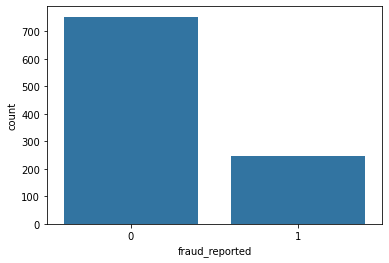

In [10]:
import seaborn as sns
sns.countplot(x='fraud_reported', data=df)

In [11]:
X = df.drop('fraud_reported', axis=1)
y = df['fraud_reported']

In [12]:
# Opcion 1:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
y = y.to_numpy()
# Opcion 2:
#X_train.to_numpy(), y_train.to_numpy(), X_test.to_numpy(), y_test.to_numpy()

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
len(y_train), len(y_test)

(750, 250)

In [14]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

score = lr.score(X_test, y_test)
print(score)

0.752


In [15]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.98      0.85       180
           1       0.79      0.16      0.26        70

    accuracy                           0.75       250
   macro avg       0.77      0.57      0.56       250
weighted avg       0.76      0.75      0.69       250



In [16]:
print(confusion_matrix(y_test, y_pred)) #VP, #FP, #FN, #VN

[[177   3]
 [ 59  11]]


In [17]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)

score = dtc.score(X_test, y_test)
print(score)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.82
              precision    recall  f1-score   support

           0       0.85      0.91      0.88       180
           1       0.72      0.59      0.65        70

    accuracy                           0.82       250
   macro avg       0.78      0.75      0.76       250
weighted avg       0.81      0.82      0.81       250

[[164  16]
 [ 29  41]]


In [18]:
from sklearn.svm import SVC
svc = SVC(kernel='linear')

svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

score = svc.score(X_test, y_test)
print(score)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.788
              precision    recall  f1-score   support

           0       0.79      0.96      0.87       180
           1       0.77      0.34      0.48        70

    accuracy                           0.79       250
   macro avg       0.78      0.65      0.67       250
weighted avg       0.79      0.79      0.76       250

[[173   7]
 [ 46  24]]
